
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


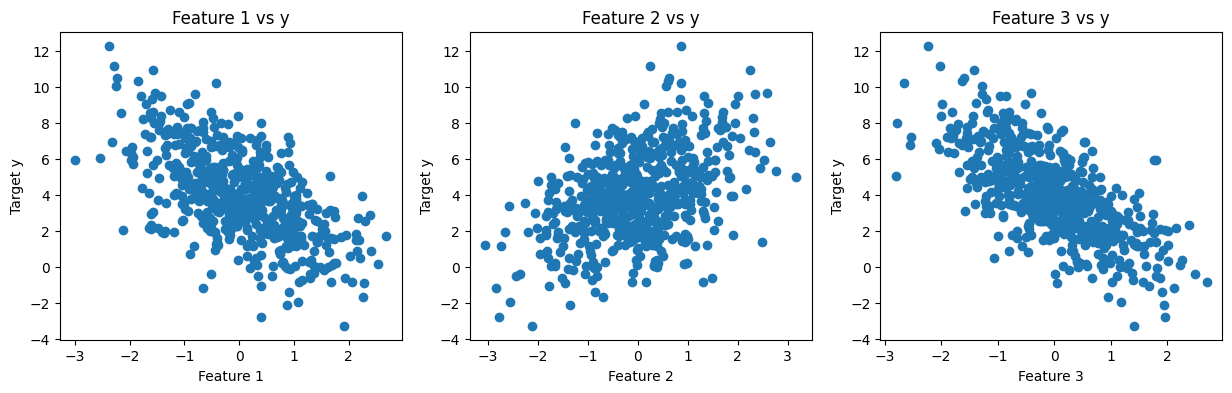

In [ ]:
# Dataset
np.random.seed(0)
m = 600   # samples
n = 3    # features

# Features
X = np.random.randn(m, n)

true_weights = np.array([-1.5, 0.9, -1.7])
true_bias = 4.0
# Noise
noise = np.random.normal(0, 0.2, size = m)

# True value
y = np.dot(X, true_weights) + true_bias + noise

features = X.shape[1]
fig, axes = plt.subplots(1, features, figsize = (5 * features, 4))

for i in range(features): # Plot with features
    axes[i].scatter(X[:, i], y)
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('Target y')
    axes[i].set_title(f'Feature {i+1} vs y')


In [ ]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        self.mean_=X.mean(axis=0)
        self.std_dev=X.std(axis=0)
        return self # return the object with predefined mean and standard deviation

    def transform(self, X):
        # Transform the values using the concept of Z-score normalization
        self.std_dev[self.std_dev== 0] = 1
        return (X - self.mean_) / self.std_dev 
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X) 
        
        


In [ ]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr, epochs, l2_lambda):
        # Initializing learning rate, epochs,L2-regularization
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b=0.0
        self.J = np.zeros(self.epochs)

        for epoch in range(self.epochs):
            y_pred = X @ self.w +self.b
            self.J[epoch] = (1 / m) * np.sum((y - y_pred) ** 2)+(self.l2_lambda / m) * np.sum(self.w ** 2)
            if(epoch%100==0):
                # Printing epoch value at every 100th epoch
                print(f"Epoch {epoch} ----> loss:{self.J[epoch]}")

            # Differnetials    
            dw = (-2 / m) * (X.T @ (y - y_pred)) +(self.l2_lambda/m)*(self.w)
            db=(2/m)*(np.sum(y_pred-y))
            # Updating weights and biases
            self.w-=self.lr*dw
            self.b-=self.lr*db
        return self

    def predict(self, X):
        # Predict values 
        return X @ self.w +self.b


In [29]:

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# Use shuffled indices
X_shuffled = X[indices]
y_shuffled = y[indices]

# Split
X_train, y_train = X_shuffled[:150], y_shuffled[:150]
X_test, y_test = X_shuffled[150:], y_shuffled[150:]

scaler = StandardScalerManual()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 0 ----> loss:21.527007730115088
Epoch 100 ----> loss:0.3718223792466368
Epoch 200 ----> loss:0.05215408648547008
Epoch 300 ----> loss:0.04679749410509467
Epoch 400 ----> loss:0.04669945038190651
Epoch 500 ----> loss:0.04669760196207681
Epoch 600 ----> loss:0.04669760218612312
Epoch 700 ----> loss:0.046697612137510294
Epoch 800 ----> loss:0.04669761461838792
Epoch 900 ----> loss:0.04669761517853746


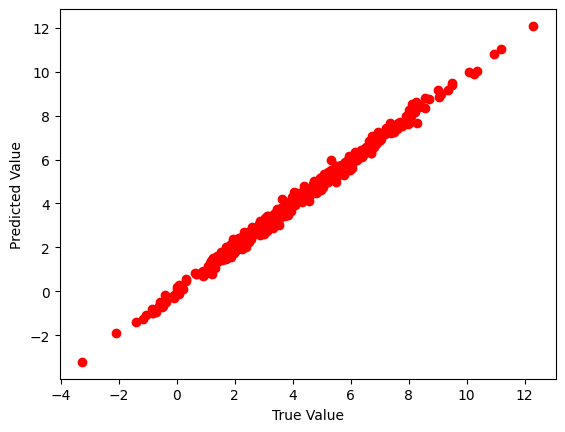

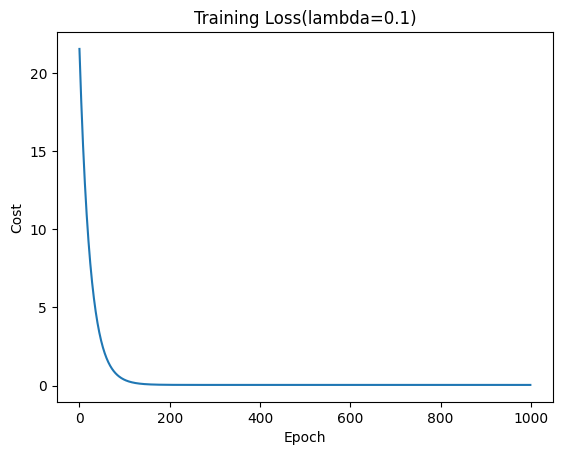

Epoch 0 ----> loss:21.527007730115088
Epoch 100 ----> loss:0.756483252177617
Epoch 200 ----> loss:0.4191478108447029
Epoch 300 ----> loss:0.4179108472989477
Epoch 400 ----> loss:0.4186267047827251
Epoch 500 ----> loss:0.418758503538063
Epoch 600 ----> loss:0.4187816978409986
Epoch 700 ----> loss:0.41878614201057357
Epoch 800 ----> loss:0.41878707973452967
Epoch 900 ----> loss:0.4187872943598619


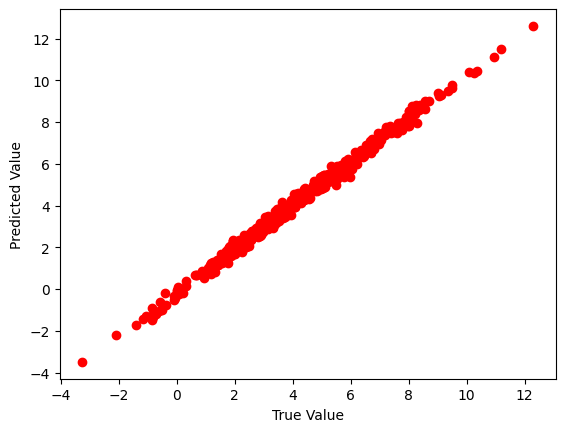

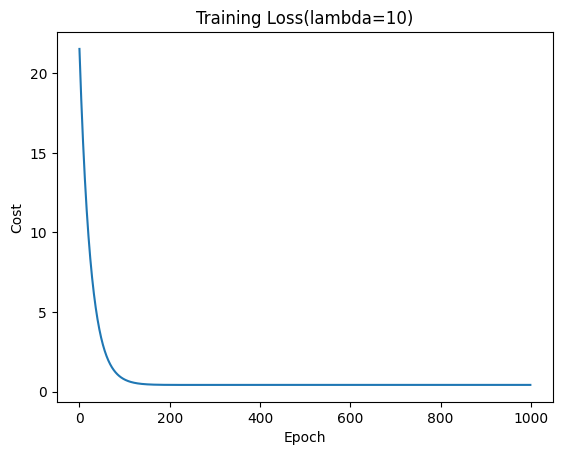

In [ ]:
# lambda=0.1
model = LinearRegressionManual(0.01,1000,0.1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
# Compare predicted and true value
plt.figure()
plt.scatter(y_test, y_pred, color='red',label='lambda=0.1')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

# Cost-Function
plt.plot(model.J)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Training Loss(lambda=0.1)")
plt.show()

# lambda=10
model = LinearRegressionManual(0.01,1000,10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test_scaled)
plt.scatter(y_test, y_pred, color='red',label='lambda=10')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()
plt.plot(model.J)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Training Loss(lambda=10)")
plt.show()

Epoch 0 ----> loss:21.527007730115088
Epoch 100 ----> loss:0.4487221443782278
Epoch 200 ----> loss:0.055198573996749066
Epoch 300 ----> loss:0.047498775082987395
Epoch 400 ----> loss:0.0473350460963061
Epoch 500 ----> loss:0.04733156250475208
Epoch 600 ----> loss:0.04733165780714039
Epoch 700 ----> loss:0.04733171486216427
Epoch 800 ----> loss:0.047331730776082284
Epoch 900 ----> loss:0.047331734983648316


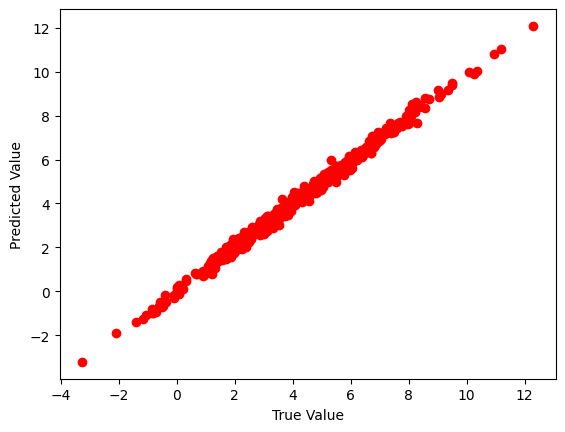

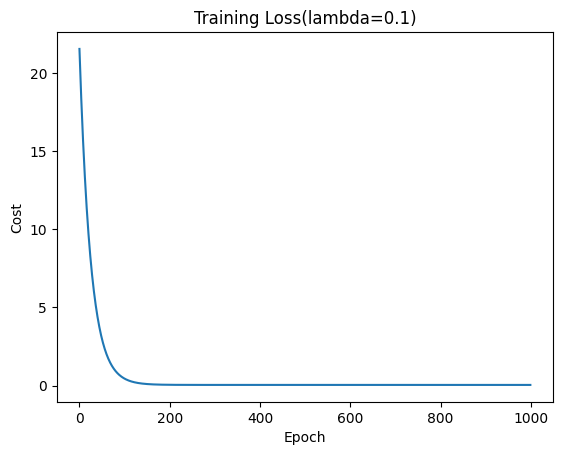

In [31]:
# Without Standardization
# lambda=0.1
model = LinearRegressionManual(0.01,1000,0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure()
plt.scatter(y_test, y_pred, color='red',label='lambda=0.1')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()
plt.plot(model.J)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Training Loss(lambda=0.1)")
plt.show()

In [ ]:
# L1 Regression
class LinearRegressionManual_L1:
    def __init__(self, lr, epochs, l1_lambda):
        self.lr = lr
        self.epochs = epochs
        self.l1_lambda = l1_lambda

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b=0.0
        self.J = np.zeros(self.epochs)

        for epoch in range(self.epochs):
            # L1-regularization= sum of lambda*|w|
            y_pred = X @ self.w +self.b
            self.J[epoch] = (1 / m) * np.sum((y - y_pred) ** 2)+(self.l1_lambda / m) * np.sum(np.abs(self.w))
            if(epoch%100==0):
                print(f"Epoch {epoch} ----> loss:{self.J[epoch]}")
            dw = (-2 / m) * (X.T @ (y - y_pred)) +np.sign(self.w)
            db=(2/m)*(np.sum(y_pred-y))
            self.w-=self.lr*dw
            self.b-=self.lr*db
        return self

    def predict(self, X):
        return X @ self.w +self.b


Epoch 0 ----> loss:21.527007730115088
Epoch 100 ----> loss:1.4843957530761585
Epoch 200 ----> loss:0.8481016852289274
Epoch 300 ----> loss:0.7984703611990119
Epoch 400 ----> loss:0.7921568774695349
Epoch 500 ----> loss:0.7912644626862213
Epoch 600 ----> loss:0.7911361302559965
Epoch 700 ----> loss:0.7911177356810299
Epoch 800 ----> loss:0.7911151529668728
Epoch 900 ----> loss:0.7911148096756069


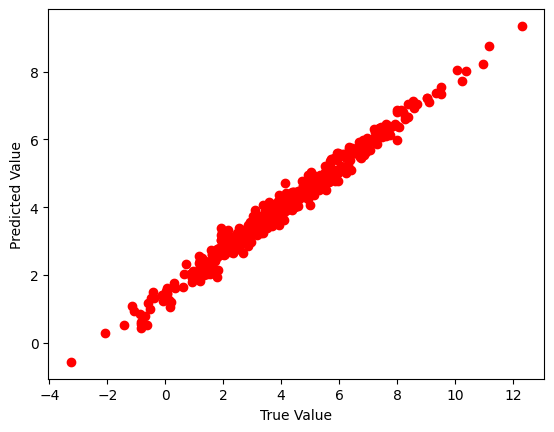

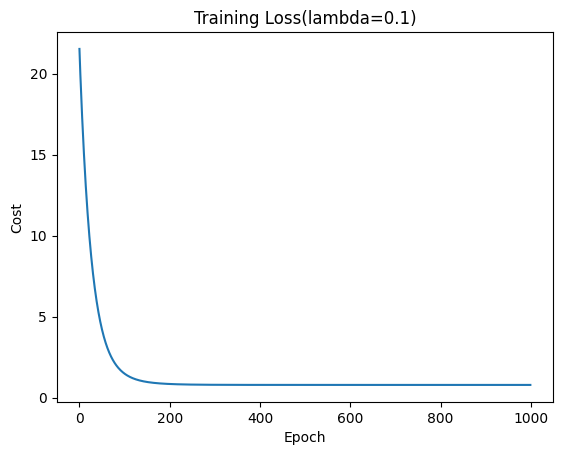

In [ ]:
# Without Standardization
# lambda=0.1
model = LinearRegressionManual_L1(0.01,1000,0.1)
model.fit(X_train, y_train)
# Predicted value vs True value
y_pred = model.predict(X_test)
plt.figure()
plt.scatter(y_test, y_pred, color='red',label='lambda=0.1')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()
# Cost Function
plt.plot(model.J)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Training Loss(lambda=0.1)")
plt.show()

L1 Regression do fits well, but the it does not penalizes as heavily as L2 Regression


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [9]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
y_class = (y >= 0.5).astype(int)  # Convert to binary: 0 or 1

# Shuffle
indices = np.arange(len(X))
np.random.shuffle(indices)

X_shuffled = X[indices]
y_class_shuffled = y_class[indices]

# Split for classification
X_train_class = X_shuffled[:150]
y_train_class = y_class_shuffled[:150]
X_test_class = X_shuffled[150:]
y_test_class = y_class_shuffled[150:]

scaler = StandardScalerManual()
X_train_scaled = scaler.fit_transform(X_train_class)
X_test_scaled = scaler.transform(X_test_class)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegressionManual:
    def __init__(self, lr, epochs, l2_lambda):
        # Initialization
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b=0.0
        self.loss = np.zeros(self.epochs)

        for epoch in range(self.epochs):
            z = X @ self.w +self.b
            y_pred = sigmoid(z)
            # Loss function
            self.loss[epoch] = -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))+(self.l2_lambda/m)*np.sum(self.w[1:]**2)

            # Differentials
            dw=(1/m)*((X.T @ (y_pred-y)) + 2*self.l2_lambda*self.w)
            db=(2/m)*np.sum(y_pred-y)
            
            # Update weights and biases
            self.w -= self.lr * dw
            self.b-=self.lr*db
            if(epoch % 100==0):
                print(f"Epoch {epoch}---> loss:{self.loss[epoch]}")
        return self

    def predict_proba(self, X):
        # Return sigmoid fucntion
        return sigmoid(X @ self.w+self.b)

    def predict(self, X):
        # Set a Threshold
        return (self.predict_proba(X) >= 0.5).astype(int)


In [ ]:
model = LogisticRegressionManual( 0.01,1000 ,0.1)
model.fit(X_train_scaled, y_train_class)
y_pred = model.predict(X_test_scaled)

# Caluclating accuracy, points where predicted and true value are same
accuracy = np.mean(y_pred == y_test_class)
print("Accuracy:", accuracy)


Epoch 0---> loss:0.6931471805599454
Epoch 100---> loss:0.4947297298788461
Epoch 200---> loss:0.4151695305543405
Epoch 300---> loss:0.3788238966353468
Epoch 400---> loss:0.36030693981641904
Epoch 500---> loss:0.3500711829018275
Epoch 600---> loss:0.3440523503229435
Epoch 700---> loss:0.3403365796760273
Epoch 800---> loss:0.3379489743040403
Epoch 900---> loss:0.3363615161491972
Accuracy: 0.94


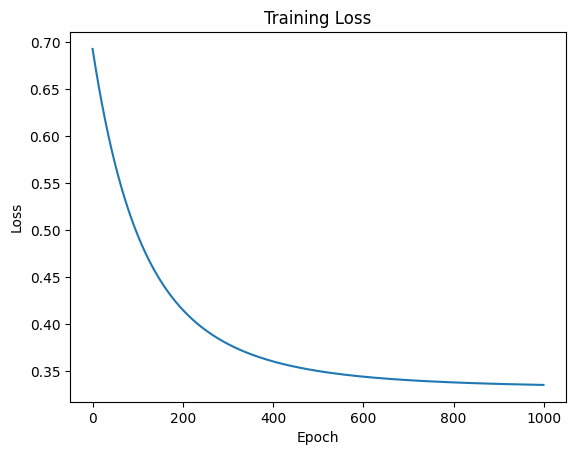

In [ ]:
plt.plot(model.loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss(lambda=0.1)")
plt.show()

Epoch 0---> loss:0.6931471805599454
Epoch 100---> loss:0.4947424750867254
Epoch 200---> loss:0.4152098287657005
Epoch 300---> loss:0.3788999426372914
Epoch 400---> loss:0.36042419107353835
Epoch 500---> loss:0.35023317150129385
Epoch 600---> loss:0.34426104124511475
Epoch 700---> loss:0.3405926406487215
Epoch 800---> loss:0.3382520147127291
Epoch 900---> loss:0.33671030511732974
Accuracy: 0.94


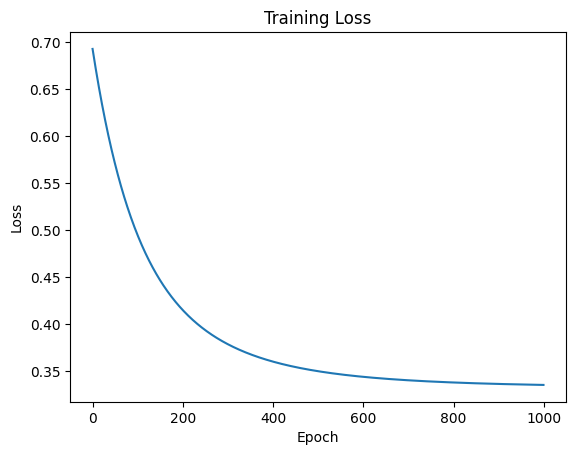

In [ ]:
model = LogisticRegressionManual( 0.01,1000 ,1)
model.fit(X_train_scaled, y_train_class)

y_pred = model.predict(X_test_scaled)

# Predict accuracy 
accuracy = np.mean(y_pred == y_test_class)
print("Accuracy:", accuracy)

plt.plot(model.loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss(lambda=1)")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    n,m=M.shape
    np.random.seed(42)
    centroids = np.random.choice(M.flatten(), size=k, replace=False)
    assignment_table=np.zeros((n,m),dtype=int)
     # Initalizing centroids with random values in M
    for iter in range(max_iters):
        cookbook={cluster_index:[] for cluster_index in range(k)}
        prev_centroids=centroids.copy() # To store previous value of centroids array
        for i in range(n):
            for j in range(m):
                data=M[i,j]
                distance=np.abs(data-centroids) # Compute the disatnce
                assignment_table[i,j]=np.argmin(distance) # Find the centroid index corresponding to which min distance is obtained
                cookbook[assignment_table[i,j]].append((i,j)) # add index tuple in the dictionary
        for cluster_index in range(k):
            if cookbook[cluster_index]:  # avoid empty cluster
                cluster_values = [M[i, j] for (i, j) in cookbook[cluster_index]]
                centroids[cluster_index] = np.mean(cluster_values)
        if np.allclose(prev_centroids, centroids):
            # If norm difference is very small, then break the loop
            print('stopped at iteration-',iter)
            break
    return assignment_table,cookbook,centroids

        
#  '''
#     Returns:
#     assignment_table: same shape as M, contains cluster labels
#     cookbook: dict -> cluster_id : list of (i, j) positions
#     centroids: numpy array of centroid values
#     ''' 


In [ ]:
np.random.seed(42)
# Random matrix
M = np.random.randint(0, 100, size = (8, 8))
print(M)

[[51 92 14 71 60 20 82 86]
 [74 74 87 99 23  2 21 52]
 [ 1 87 29 37  1 63 59 20]
 [32 75 57 21 88 48 90 58]
 [41 91 59 79 14 61 61 46]
 [61 50 54 63  2 50  6 20]
 [72 38 17  3 88 59 13  8]
 [89 52  1 83 91 59 70 43]]


In [ ]:
k=4
# Print assignment_table
assignment_table,cookbook,centroids=kmeans_matrix(M,k,max_iters=100)
print("Centroids:",centroids)
print("Assignment Table:\n",assignment_table)
print("Cookbook:\n",cookbook)

stopped at iteration- 3
Centroids: [83  3 53 20]
Assignment Table:
 [[2 0 3 0 2 3 0 0]
 [0 0 0 0 3 1 3 2]
 [1 0 3 2 1 2 2 3]
 [3 0 2 3 0 2 0 2]
 [2 0 2 0 3 2 2 2]
 [2 2 2 2 1 2 1 3]
 [0 2 3 1 0 2 3 1]
 [0 2 1 0 0 2 0 2]]
Cookbook:
 {0: [(0, 1), (0, 3), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (2, 1), (3, 1), (3, 4), (3, 6), (4, 1), (4, 3), (6, 0), (6, 4), (7, 0), (7, 3), (7, 4), (7, 6)], 1: [(1, 5), (2, 0), (2, 4), (5, 4), (5, 6), (6, 3), (6, 7), (7, 2)], 2: [(0, 0), (0, 4), (1, 7), (2, 3), (2, 5), (2, 6), (3, 2), (3, 5), (3, 7), (4, 0), (4, 2), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 3), (5, 5), (6, 1), (6, 5), (7, 1), (7, 5), (7, 7)], 3: [(0, 2), (0, 5), (1, 4), (1, 6), (2, 2), (2, 7), (3, 0), (3, 3), (4, 4), (5, 7), (6, 2), (6, 6)]}


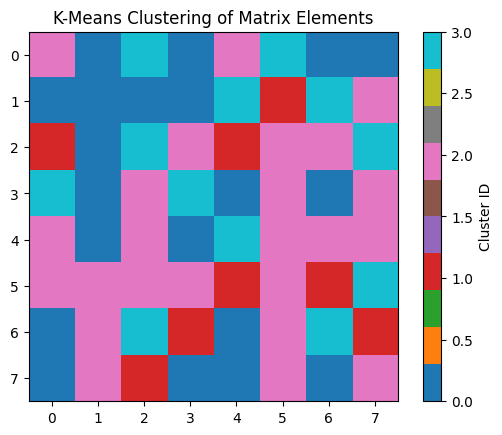

In [28]:
plt.imshow(assignment_table, cmap = "tab10")
plt.colorbar(label = "Cluster ID")  # For color bar
plt.title("K-Means Clustering of Matrix Elements")
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
